<a href="https://colab.research.google.com/github/zurriyatafatni/irisEye_ImageProcessing/blob/main/Iris_Eye_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
np.set_printoptions(threshold=np.inf)

# **Preprocessing**

Read raw image

dimensi gambar: (280, 320)
89600


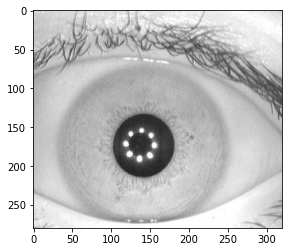

In [ ]:
#read image
gambar = cv2.imread('S1002L03.jpg')
bgr = cv2.cvtColor(gambar,cv2.COLOR_RGB2BGR)
dimensi = gambar[:,:,0]
print('dimensi gambar:',dimensi.shape)
print(dimensi.size)
plt.imshow(bgr)
plt.show()


In [ ]:
#print as array
# print(np.array(dimensi))

Convert image to grayscale

(280, 320)


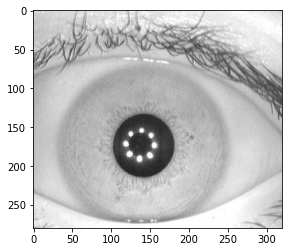

In [ ]:
gray = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)
bgr = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)
# dimensi2 = gray[:,:,0]
print(gray.shape)
plt.imshow(bgr)
plt.show()

In [ ]:
#print as array
# print(np.array(gray))
gray_dim = np.array(gray)
df = pd.DataFrame(gray_dim)
writer = df.to_excel('TA.xlsx', sheet_name='grayscale', header=False, index=False, index_label=None, startrow=0, startcol=0)

## **Canny Edge Detection**

(280, 320)


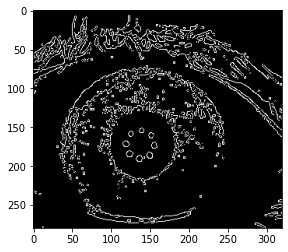

In [ ]:
ret, thresh = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
canny = cv2.Canny(thresh,50,100)
dim = cv2.cvtColor(canny, cv2.COLOR_RGB2BGR)
print(canny.shape)
plt.imshow(dim)
plt.show()

In [ ]:
# print(np.array(canny))

In [ ]:
dimensi = np.asarray(canny)

# Create a Pandas dataframe from the data.
df = pd.DataFrame(dimensi)
writer = df.to_excel('canny.xlsx', sheet_name='Canny', header=False, index=False, index_label=None, startrow=0, startcol=0)


## **Hough Transform**

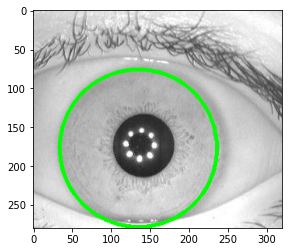

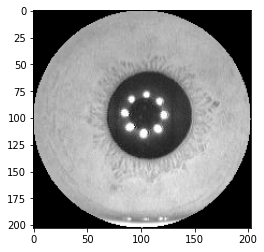

In [ ]:
# circles = cv2.HoughCircles(canny,cv2.HOUGH_GRADIENT,1,10000,param1=50,param2=30,minRadius=50,maxRadius=100)
circles = cv2.HoughCircles(canny,cv2.HOUGH_GRADIENT,1,10000,param1=50,param2=30,minRadius=0,maxRadius=1000)

height,width = gray.shape
r = 0
mask = np.zeros((height,width), np.uint8)
for i in circles[0,:]:
    cv2.circle(bgr,(i[0],i[1]),i[2],(0,255,0),3)
    cv2.circle(mask,(i[0],i[1]),i[2],(255,255,255),thickness=-1)
    blank_image = bgr[:int(i[1]),:int(i[1])]

    masked_data = cv2.bitwise_and(gray, gray, mask=mask)
    _,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)
    contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    x,y,w,h = cv2.boundingRect(contours[0][0])
    crop = masked_data[y:y+h,x:x+w]
    r = i[2]
    crop_dim =cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)

plt.imshow(bgr)
plt.show()
plt.imshow(crop_dim)
plt.show()

**Normalisasi with daugman's normalization**

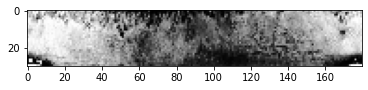

(30, 180)

In [ ]:
# liang's code for reference
def daugman_normalization(image, height, width, r_in, r_out):       
    thetas = np.arange(0, 2 * np.pi, 2 * np.pi / width)  # Theta values
    r_out = r_in + r_out
    # Create empty flatten image
    flat = np.zeros((height,width, 3), np.uint8)
    circle_x = int(image.shape[0] / 2)
    circle_y = int(image.shape[1] / 2)

    for i in range(width):
        for j in range(height):
            theta = thetas[i]  # value of theta coordinate
            r_pro = j / height  # value of r coordinate(normalized)

            # get coordinate of boundaries
            Xi = circle_x + r_in * np.cos(theta)
            Yi = circle_y + r_in * np.sin(theta)
            Xo = circle_x + r_out * np.cos(theta)
            Yo = circle_y + r_out * np.sin(theta)

            # the matched cartesian coordinates for the polar coordinates
            Xc = (1 - r_pro) * Xi + r_pro * Xo
            Yc = (1 - r_pro) * Yi + r_pro * Yo

            color = image[int(Xc)][int(Yc)]  # color of the pixel

            flat[j][i] = color
    return flat  
try:
  image_nor = daugman_normalization(crop_dim,30,180,50,50)
  #3D to 2D
  im = cv2.cvtColor(image_nor,cv2.COLOR_BGR2GRAY)
  equ = cv2.equalizeHist(im)
  #2D to 3D
  bgr_equ = cv2.cvtColor(equ, cv2.COLOR_RGB2BGR)
except:
  image_nor = daugman_normalization(crop_dim,30,180,45,45)
  im = cv2.cvtColor(image_nor,cv2.COLOR_BGR2GRAY)
  equ = cv2.equalizeHist(im)
  bgr_equ = cv2.cvtColor(equ, cv2.COLOR_RGB2BGR)


plt.imshow(bgr_equ)
plt.show()
cv2.imwrite('normalisasi.jpg', image_nor)
equ.shape

(30, 180, 3)

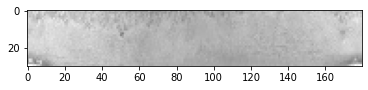

In [ ]:
image_norm = cv2.imread('normalisasi.jpg') 
# cv2.imshow('/sample_Data/normalisasi.jpg',image_norm)
plt.imshow(image_norm)
image_norm.shape

(30, 180)

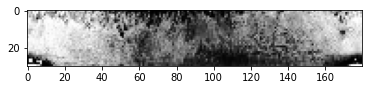

In [ ]:
image_normalisasi = cv2.imread('normalisasi.jpg',0) 
equ = cv2.equalizeHist(image_normalisasi)
bgr_equ = cv2.cvtColor(equ, cv2.COLOR_RGB2BGR)
# equ = equ[:,:,0]
plt.imshow(bgr_equ)
equ.shape
# cv2.imwrite('equ.jpg', equ)

In [ ]:
reshape = image_norm[:,:,0]
reshape_dim = np.array(reshape)
df = pd.DataFrame(reshape_dim)
writer = df.to_excel('daugmans.xlsx', sheet_name='daugmans', header=False, index=False, index_label=None, startrow=0, startcol=0)
print(reshape.shape)
print(image_norm.size)

(30, 180)
16200


In [ ]:
print(np.array(reshape))

[[ 64  68  94 106 115 123 107 116  93 107 102  97  71  71  50  41  79  51
   93  76  89  96  87 251 255 255 246 175 114  79  82  75  67  58  48  51
   44  46  43  47  40  41  49  40  45  47  37  41  41  34  42  40  40  37
   42  82 107 158 147 168 183 184 185 176 170 169 179 175 183 179 185 178
  178 177 175 182 177 167 168 169 167 168 158 161 161 154 162 158 158 160
  159 159 158 157 160 161 155 159 160 161 160 159 156 171 165 165 163 161
  162 169 160 158 156 161 158 161 162 158 161 164 163 162 164 166 165 165
  167 163 164 167 162 163 159 160 161 160 159 163 156 163 153 161 160 166
  172 166 172 174 168 162 174 175 174 173 175 178 181 179 176 172 171 178
  185 176 160 171 124  51  79  67  77  52  51  57  61  59  53  46  47  55]
 [ 62  60  70  78  83  97 105  93  96 122 255 247 219  96  78  82  77  80
  114 114  83 126 138 255 254 253 252 200 112 103  81  66  61  54  51  52
   50  46  45  45  46  47  45  38  41  50  38  38  39  39  47  35  57  35
   66 137 152 174 153 169 181 180 180

# **Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pca = PCA(.95)
lower_dimensional_data = pca.fit_transform(reshape.data)
print(pca.n_components_)

10


In [ ]:
approximation = pca.inverse_transform(lower_dimensional_data)
cv2.imwrite('pca.jpg',approximation)

True

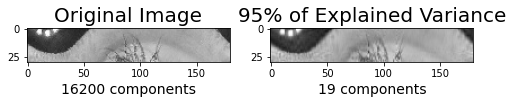

In [ ]:
pca = cv2.imread('pca.jpg')

plt.figure(figsize=(8,4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_norm)
plt.xlabel('16200 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(pca)
plt.xlabel('19 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

In [ ]:
pca_dim = pca[:,:,0]
print(pca_dim.shape)
print(np.array(pca_dim))
pca_dim = np.array(pca_dim)
pcaaa = pca_dim.flatten()
df = pd.DataFrame(pca_dim)
writer = df.to_excel('PCA.xlsx', sheet_name='PCA', header=False, index=False, index_label=None, startrow=0, startcol=0)

pcaaa

(30, 180)
[[ 72  70  92 101 110 120 110 104  83  92 126 118  92  75  53  45  58  43
   82  72  74 100  95 243 250 254 254 187 111  89  87  68  65  56  46  43
   41  47  49  51  44  48  51  41  42  42  27  28  39  46  58  47  43  30
   44  98 115 160 148 170 181 182 186 178 173 171 178 176 180 178 184 181
  179 175 177 184 178 161 159 173 165 158 163 151 160 145 157 165 158 158
  162 157 167 151 162 164 161 159 163 161 156 152 146 168 165 166 165 160
  160 168 160 158 143 174 164 166 158 163 158 165 166 165 167 168 165 165
  167 163 168 169 165 165 160 159 161 162 159 162 159 162 155 161 160 166
  169 166 172 172 172 163 173 175 176 172 175 176 178 179 175 173 168 179
  179 173 160 164 138  70  98  61  69  62  65  67  54  41  42  38  51  60]
 [ 55  55  73  84  89  94  97 107 101 162 219 213 196  80  79  80  94  99
  133 124  96 118 128 255 255 252 237 184 115  85  75  71  66  59  58  64
   55  45  38  41  39  45  45  42  42  48  42  48  52  42  39  28  41  41
   71 125 148 171 149 165 1

array([ 72,  70,  92, 101, 110, 120, 110, 104,  83,  92, 126, 118,  92,
        75,  53,  45,  58,  43,  82,  72,  74, 100,  95, 243, 250, 254,
       254, 187, 111,  89,  87,  68,  65,  56,  46,  43,  41,  47,  49,
        51,  44,  48,  51,  41,  42,  42,  27,  28,  39,  46,  58,  47,
        43,  30,  44,  98, 115, 160, 148, 170, 181, 182, 186, 178, 173,
       171, 178, 176, 180, 178, 184, 181, 179, 175, 177, 184, 178, 161,
       159, 173, 165, 158, 163, 151, 160, 145, 157, 165, 158, 158, 162,
       157, 167, 151, 162, 164, 161, 159, 163, 161, 156, 152, 146, 168,
       165, 166, 165, 160, 160, 168, 160, 158, 143, 174, 164, 166, 158,
       163, 158, 165, 166, 165, 167, 168, 165, 165, 167, 163, 168, 169,
       165, 165, 160, 159, 161, 162, 159, 162, 159, 162, 155, 161, 160,
       166, 169, 166, 172, 172, 172, 163, 173, 175, 176, 172, 175, 176,
       178, 179, 175, 173, 168, 179, 179, 173, 160, 164, 138,  70,  98,
        61,  69,  62,  65,  67,  54,  41,  42,  38,  51,  60,  5